In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/hayden/Desktop/provincial council internship/df.csv', encoding='utf-8')



In [3]:
df

,STTN_NM,MSR_DT,기온(°C),강수량(mm),풍속(m/s),습도(%),일조(hr),적설(cm),전운량(10분위),PM25,PM10,O3,CO,SO2,NO2
0,창원,2021010101,0.253165,0.000000,0.095890,0.673469,0.0,0.006024,0.0,0.040359,0.016602,0.067797,0.114286,0.083333,0.277778
1,창원,2021010102,0.235081,0.000000,0.123288,0.602041,0.0,0.006024,0.0,0.040359,0.016602,0.135593,0.057143,0.083333,0.133333
2,창원,2021010103,0.224231,0.000000,0.082192,0.571429,0.0,0.006024,0.0,0.067265,0.016602,0.118644,0.085714,0.083333,0.144444
3,창원,2021010104,0.215190,0.000000,0.054795,0.571429,0.0,0.006024,0.0,0.062780,0.018555,0.112994,0.057143,0.083333,0.144444
4,창원,2021010105,0.211573,0.000000,0.041096,0.602041,0.0,0.006024,0.0,0.044843,0.015625,0.096045,0.085714,0.083333,0.155556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301381,남해,2023123019,0.439421,0.004386,0.013699,0.918367,0.0,0.000000,1.0,0.318386,0.071289,0.214689,0.242857,0.104167,0.222222
301382,남해,2023123020,0.428571,0.007456,0.027397,0.948980,0.0,0.000000,0.3,0.282511,0.060547,0.186441,0.214286,0.095833,0.188889
301383,남해,2023123021,0.433996,0.010526,0.054795,0.928571,0.0,0.000000,1.0,0.278027,0.061523,0.175141,0.240000,0.108333,0.166667
301384,남해,2023123022,0.430380,0.010526,0.089041,0.897959,0.0,0.000000,0.8,0.264574,0.063477,0.152542,0.297143,0.095833,0.166667


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('/Users/hayden/Desktop/provincial council internship/df.csv', encoding='utf-8')

# 'MSR_DT'를 datetime 형식으로 변환
df['MSR_DT'] = pd.to_datetime(df['MSR_DT'], format='%Y%m%d%H')

# 'STTN_NM'을 dummy 변수로 변환
df = pd.get_dummies(df, columns=['STTN_NM'])

# 예측할 컬럼 설정 (예: PM10)
target_col = 'PM10'

# 입력 데이터와 출력 데이터 분리
X = df.drop(['MSR_DT', target_col], axis=1).values
y = df[target_col].values

# 데이터 스케일링
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()


In [8]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [9]:
# RandomForest 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
# 예측 수행
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 원래 스케일로 되돌리기
y_train_inverse = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_inverse = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_train_inverse = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_pred_test_inverse = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()


Train MSE: 0.00, Train MAE: 0.00
Test MSE: 0.00, Test MAE: 0.01


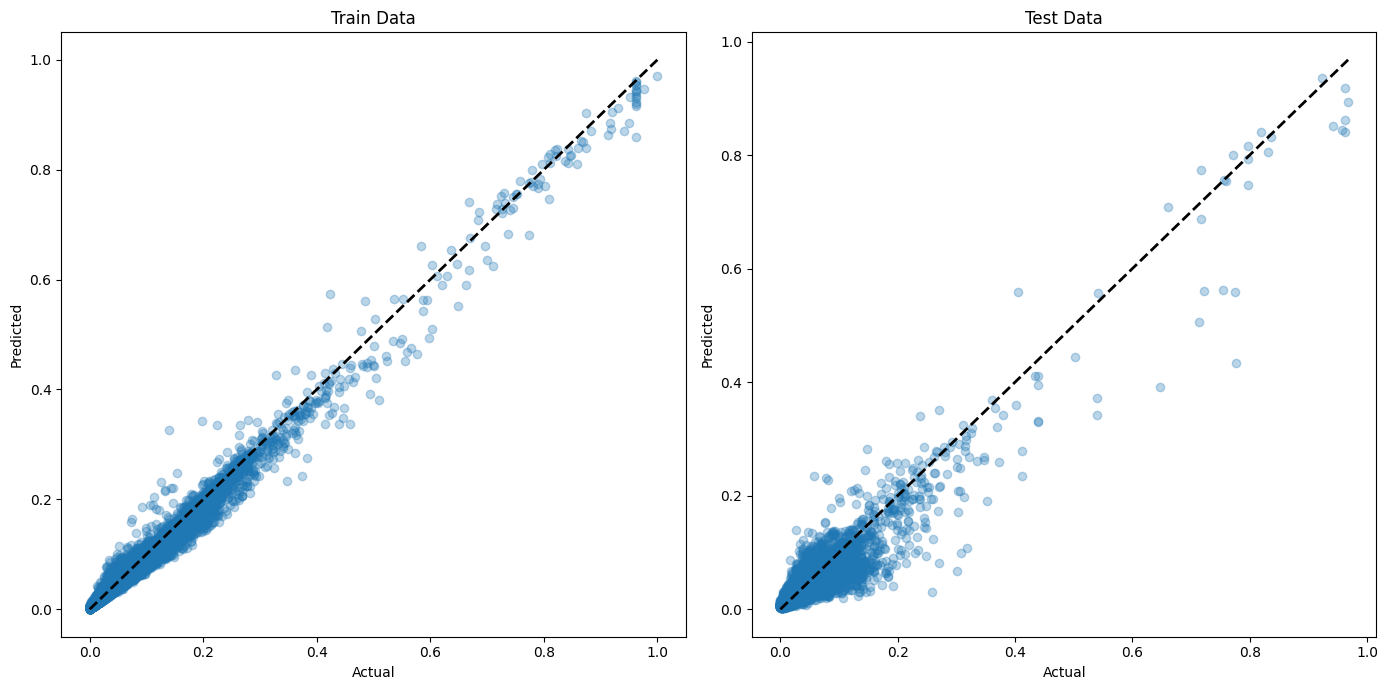

In [15]:
# 평가 지표 계산
mse_train = mean_squared_error(y_train_inverse, y_pred_train_inverse)
mae_train = mean_absolute_error(y_train_inverse, y_pred_train_inverse)
mse_test = mean_squared_error(y_test_inverse, y_pred_test_inverse)
mae_test = mean_absolute_error(y_test_inverse, y_pred_test_inverse)

print(f'Train MSE: {mse_train:.2f}, Train MAE: {mae_train:.2f}')
print(f'Test MSE: {mse_test:.2f}, Test MAE: {mae_test:.2f}')

# 시각화
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_train_inverse, y_pred_train_inverse, alpha=0.3)
plt.plot([y_train_inverse.min(), y_train_inverse.max()], [y_train_inverse.min(), y_train_inverse.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Train Data')

plt.subplot(1, 2, 2)
plt.scatter(y_test_inverse, y_pred_test_inverse, alpha=0.3)
plt.plot([y_test_inverse.min(), y_test_inverse.max()], [y_test_inverse.min(), y_test_inverse.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data')

plt.tight_layout()
plt.show()


CNN, RNN, LSTM, Conformer, bidirectional lstm, transformer
- 회귀분석을 통해서 어떤 피쳐가 가장 영향을 많이 주는지 피쳐랭킹 정하기
- 주어진 13개 피처를 통해서 다른 피처 구하기
- 기계학습은 이유 설명이 불가능하니까 그게 가능한 회귀분석을 주 분석으로 하는 것을 추천.
의미있는 하나를 두고 회귀분석 돌려보면 관계식이 나올 거다 

Train MSE: 0.00, Train MAE: 0.01
Test MSE: 0.00, Test MAE: 0.01


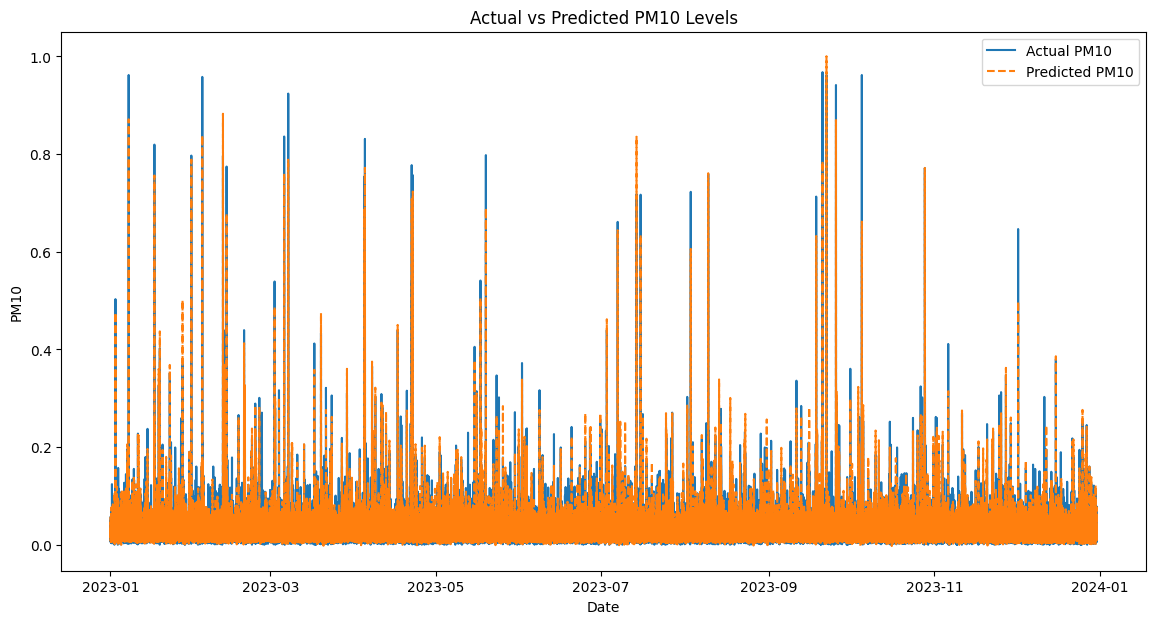

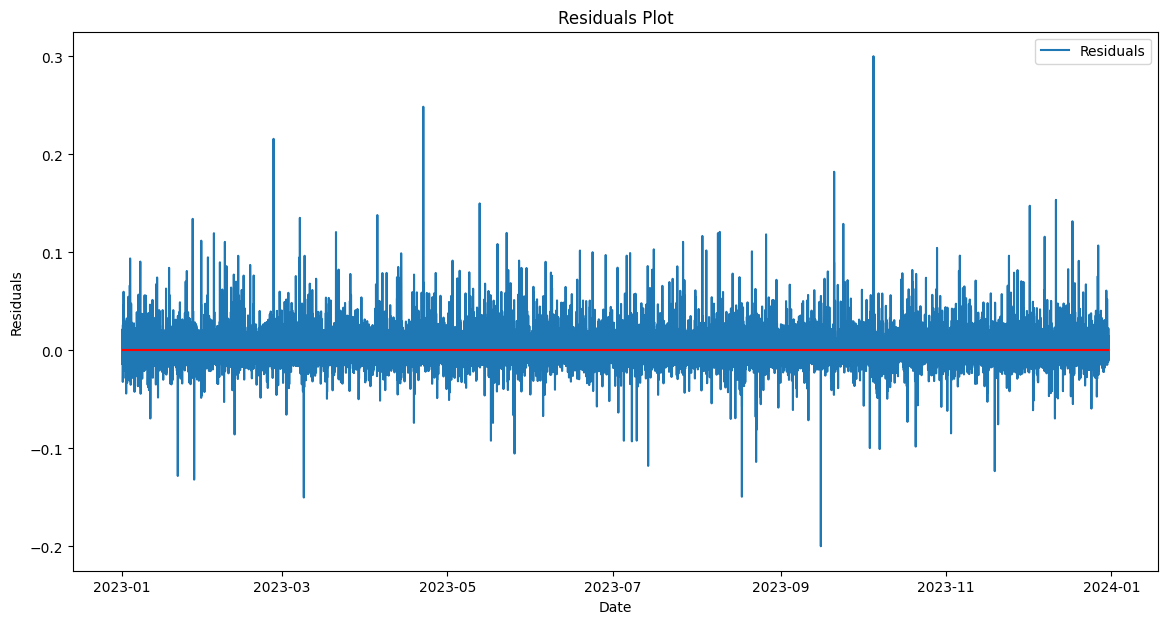

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# 데이터 로드 및 전처리
df = pd.read_csv('/Users/hayden/Desktop/provincial council internship/df.csv', encoding='utf-8')

# MSR_DT를 날짜 형식으로 변환
df['MSR_DT'] = pd.to_datetime(df['MSR_DT'], format='%Y%m%d%H')

# 문자열 열을 원-핫 인코딩으로 변환
df = pd.get_dummies(df, columns=['STTN_NM'])

# Feature와 Target 변수 설정
target_col = 'PM10'
X = df.drop(['MSR_DT', target_col], axis=1)
y = df[target_col]

# 데이터 스케일링
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 테스트 데이터 인덱스 추출
test_indices = X.index[X_train.shape[0]:]

# 모델 훈련
model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
model.fit(X_train, y_train.ravel())

# 예측
y_pred_train_scaled = model.predict(X_train)
y_pred_test_scaled = model.predict(X_test)

# 예측값 역변환
y_train_inverse = scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).flatten()
y_test_inverse = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()

# 실제 값 역변환
y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# 평가 지표 계산
mse_train = mean_squared_error(y_train_actual, y_train_inverse)
mae_train = mean_absolute_error(y_train_actual, y_train_inverse)
mse_test = mean_squared_error(y_test_actual, y_test_inverse)
mae_test = mean_absolute_error(y_test_actual, y_test_inverse)

print(f'Train MSE: {mse_train:.2f}, Train MAE: {mae_train:.2f}')
print(f'Test MSE: {mse_test:.2f}, Test MAE: {mae_test:.2f}')

# 시각화에 사용할 인덱스 생성
test_dates = df['MSR_DT'].iloc[test_indices]

# 실제 값과 예측 값 시각화
plt.figure(figsize=(14, 7))
plt.plot(test_dates, y_test_actual, label='Actual PM10')
plt.plot(test_dates, y_test_inverse, label='Predicted PM10', linestyle='--')
plt.legend()
plt.xlabel('Date')
plt.ylabel('PM10')
plt.title('Actual vs Predicted PM10 Levels')
plt.show()

# 잔차 플롯
residuals = y_test_actual - y_test_inverse
plt.figure(figsize=(14, 7))
plt.plot(test_dates, residuals, label='Residuals')
plt.hlines(0, test_dates.min(), test_dates.max(), colors='r')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


너무 완벽하게 나와서1. 데이터 문제
데이터 누락: 데이터 분할이나 전처리 과정에서 데이터가 제대로 처리되지 않았을 수 있습니다. 데이터가 잘못 분할되었거나 훈련 데이터와 테스트 데이터가 동일할 수 있습니다.
데이터 스케일링: 스케일링 과정에서 데이터가 너무 작거나 큰 값으로 변환되어 모델이 이를 쉽게 맞출 수 있을 수 있습니다.
2. 모델 문제
과적합(overfitting): 모델이 너무 복잡하여 훈련 데이터에 지나치게 맞춰졌을 수 있습니다. 이 경우, 테스트 데이터에서도 과적합이 발생할 수 있습니다.
매우 간단한 데이터 패턴: 데이터가 매우 간단하여 모델이 쉽게 예측할 수 있는 패턴을 가지고 있을 수 있습니다.
3. 코드 문제
코드 오류: 코드에서 예측 또는 평가 지표를 계산하는 과정에서 오류가 있을 수 있습니다.
확인 및 해결 방법
데이터 분할 확인:

train_test_split 함수가 데이터를 제대로 분할하고 있는지 확인합니다.
훈련 데이터와 테스트 데이터가 중복되지 않도록 합니다.
데이터 스케일링 확인:

스케일링된 데이터의 범위를 확인하여 비정상적으로 작거나 큰 값이 없는지 확인합니다.
스케일링 전후의 데이터를 시각화하여 비교합니다.
모델 복잡성 조절:

모델의 복잡성을 줄여 과적합을 방지합니다.
규제(regularization) 기법을 도입하여 모델을 일반화합니다.
평가 지표 확인:

예측값과 실제값을 시각화하여 모델이 제대로 작동하고 있는지 확인합니다.
예측값과 실제값의 분포를 비교합니다.
아래는 데이터 분할 및 스케일링을 다시 확인하고, 예측값과 실제값을 시각화하여 확인하는 예제 코드입니다-------
잔차 플롯의 목적은 모델이 예측에 있어 체계적인 오류를 가지고 있는지 여부를 확인하는 것입니다. 다음은 잔차 플롯을 해석하는 방법입니다:

잔차가 0을 중심으로 고르게 분포되어 있는 경우:

모델이 데이터를 잘 예측하고 있다는 것을 의미합니다.
잔차가 무작위로 분포되어 있으면, 모델이 특정 패턴을 잘 캡처하고 있으며 예측에 체계적인 오류가 없음을 나타냅니다.
잔차가 0을 중심으로 패턴을 보이는 경우:

모델이 특정 패턴을 놓치고 있음을 나타냅니다.
예를 들어, 잔차가 시간에 따라 증가하거나 감소하는 경향을 보이면 모델이 특정 시간 의존적인 패턴을 잘 캡처하지 못한 것입니다.
곡선 모양의 패턴이 보이면 비선형 관계를 제대로 모델링하지 못했을 수 있습니다.
잔차가 크게 변동하는 경우:

예측의 신뢰성이 떨어질 수 있음을 나타냅니다.
큰 잔차가 지속적으로 발생하면 모델이 데이터의 특정 구간을 잘 예측하지 못하고 있음을 의미할 수 있습니다.

원본 데이터 예시:
               MSR_DT    기온(°C)  강수량(mm)   풍속(m/s)     습도(%)  일조(hr)  \
0 2021-01-01 01:00:00  0.253165      0.0  0.095890  0.673469     0.0   
1 2021-01-01 02:00:00  0.235081      0.0  0.123288  0.602041     0.0   
2 2021-01-01 03:00:00  0.224231      0.0  0.082192  0.571429     0.0   
3 2021-01-01 04:00:00  0.215190      0.0  0.054795  0.571429     0.0   
4 2021-01-01 05:00:00  0.211573      0.0  0.041096  0.602041     0.0   

     적설(cm)  전운량(10분위)      PM25      PM10  ...  STTN_NM_김해  STTN_NM_남해  \
0  0.006024        0.0  0.040359  0.016602  ...       False       False   
1  0.006024        0.0  0.040359  0.016602  ...       False       False   
2  0.006024        0.0  0.067265  0.016602  ...       False       False   
3  0.006024        0.0  0.062780  0.018555  ...       False       False   
4  0.006024        0.0  0.044843  0.015625  ...       False       False   

   STTN_NM_밀양  STTN_NM_양산  STTN_NM_의령  STTN_NM_진주  STTN_NM_창원  STTN_NM_통영  \
0       False       False   

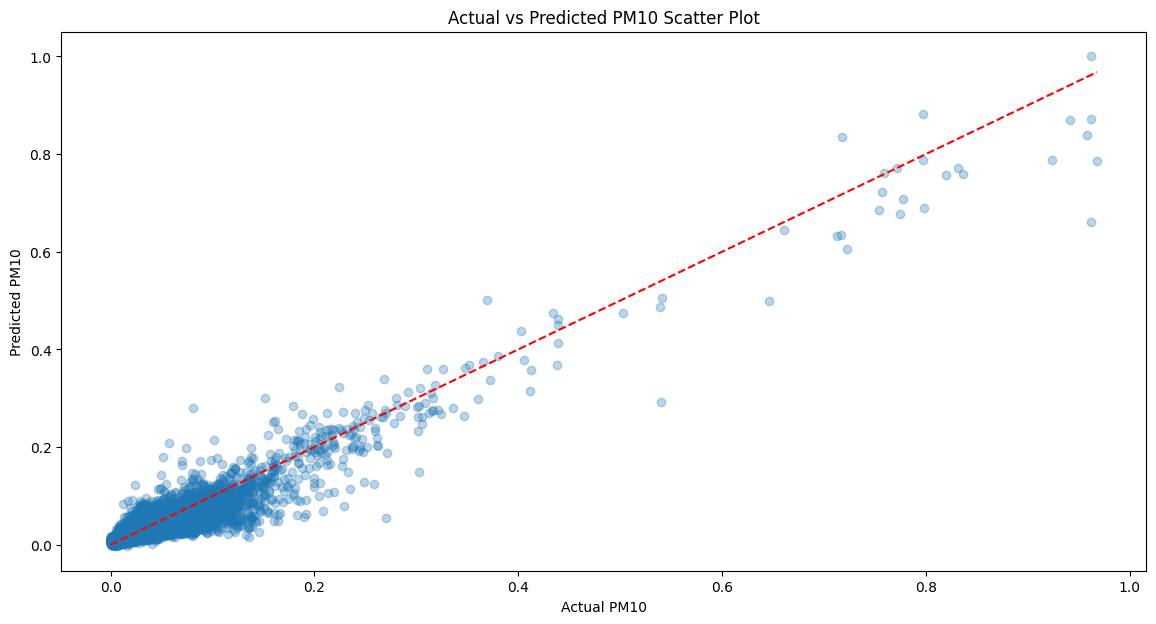

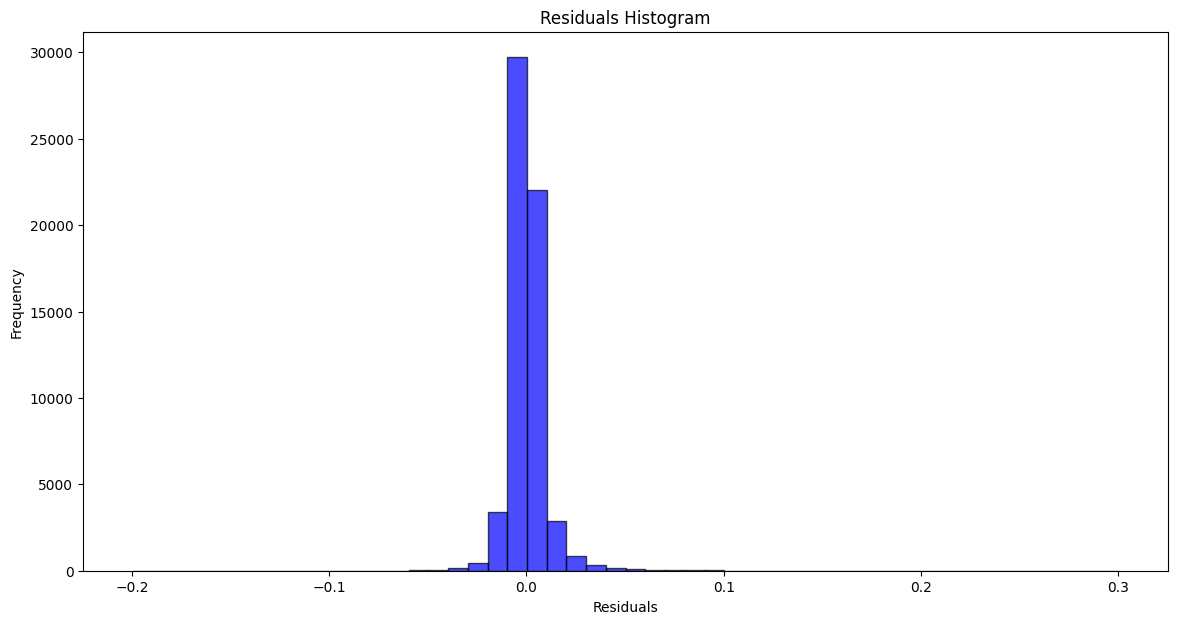

In [23]:
# 데이터 스케일링 전후 확인
print("원본 데이터 예시:")
print(df.head())

print("\n스케일링된 Feature 데이터 예시:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

print("\n스케일링된 Target 데이터 예시:")
print(pd.DataFrame(y_scaled, columns=[target_col]).head())

# 예측값과 실제값 시각화
plt.figure(figsize=(14, 7))
plt.scatter(y_test_actual, y_test_inverse, alpha=0.3)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')
plt.xlabel('Actual PM10')
plt.ylabel('Predicted PM10')
plt.title('Actual vs Predicted PM10 Scatter Plot')
plt.show()

# 잔차 히스토그램
plt.figure(figsize=(14, 7))
plt.hist(residuals, bins=50, alpha=0.7, color='b', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Histogram')
plt.show()


모델: MLPRegressor
먼저, 당신이 사용한 모델은 MLPRegressor입니다. MLPRegressor는 Scikit-Learn에서 제공하는 다층 퍼셉트론(MLP, Multi-Layer Perceptron) 기반의 회귀 모델입니다.

정의 및 설명
다층 퍼셉트론(MLP): 인공 신경망의 일종으로, 입력층, 하나 이상의 은닉층, 그리고 출력층으로 구성됩니다. 각 층은 여러 개의 뉴런으로 이루어져 있으며, 각 뉴런은 입력을 받아 가중치를 적용한 후 활성화 함수(activation function)를 통해 출력합니다.
회귀 모델(Regression Model): 주어진 입력 데이터로부터 연속적인 값을 예측하는 데 사용됩니다. 예를 들어, 기온, 강수량, 풍속 등의 특성을 바탕으로 PM10 농도를 예측하는 것이 회귀 문제에 해당합니다.
장점
비선형 데이터 학습: MLP는 비선형 활성화 함수를 사용하여 복잡한 비선형 관계를 학습할 수 있습니다.
다양한 문제에 적용 가능: 회귀, 분류, 시계열 예측 등 다양한 문제에 적용할 수 있습니다.
병렬 처리 가능: GPU를 사용하여 병렬 처리를 통해 학습 속도를 높일 수 있습니다.
단점
과적합 위험: 복잡한 모델은 훈련 데이터에 과적합될 위험이 있습니다.
매개변수 설정 어려움: 은닉층의 수, 각 층의 뉴런 수, 학습률 등의 매개변수를 잘 조정해야 좋은 성능을 얻을 수 있습니다.
큰 데이터 요구: 충분한 양의 데이터가 없으면 좋은 성능을 얻기 어려울 수 있습니다.


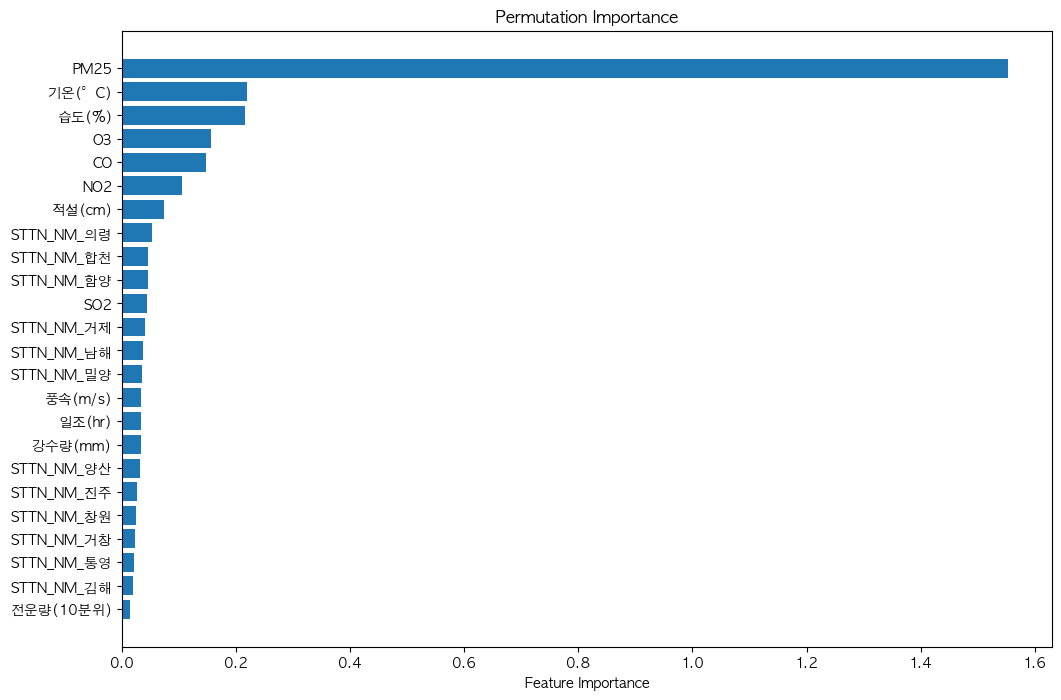

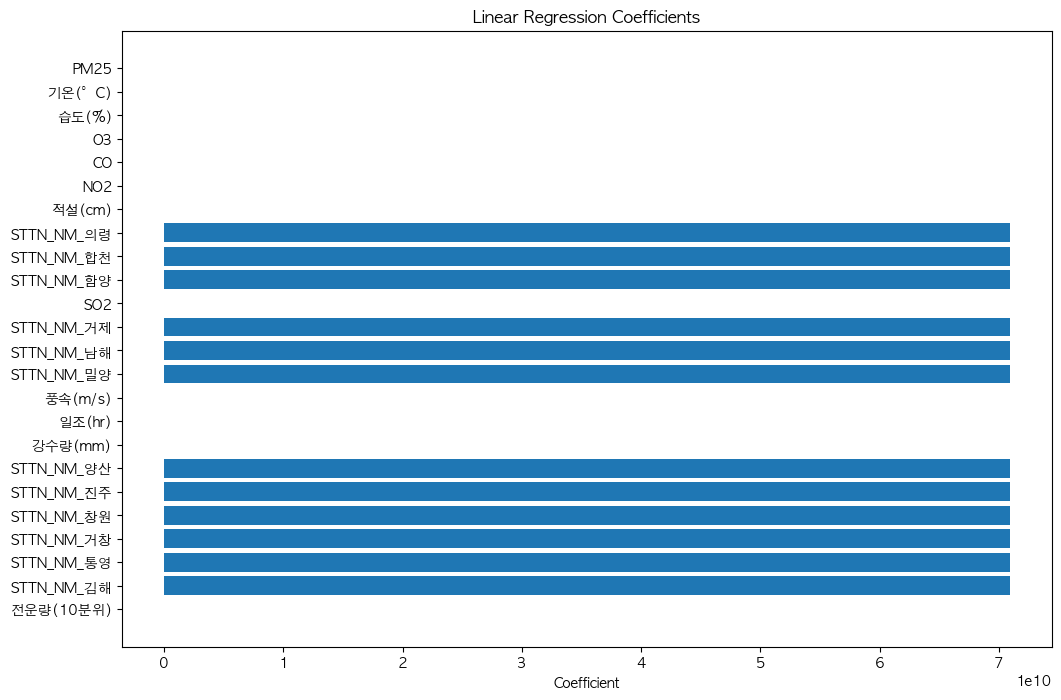

/opt/homebrew/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


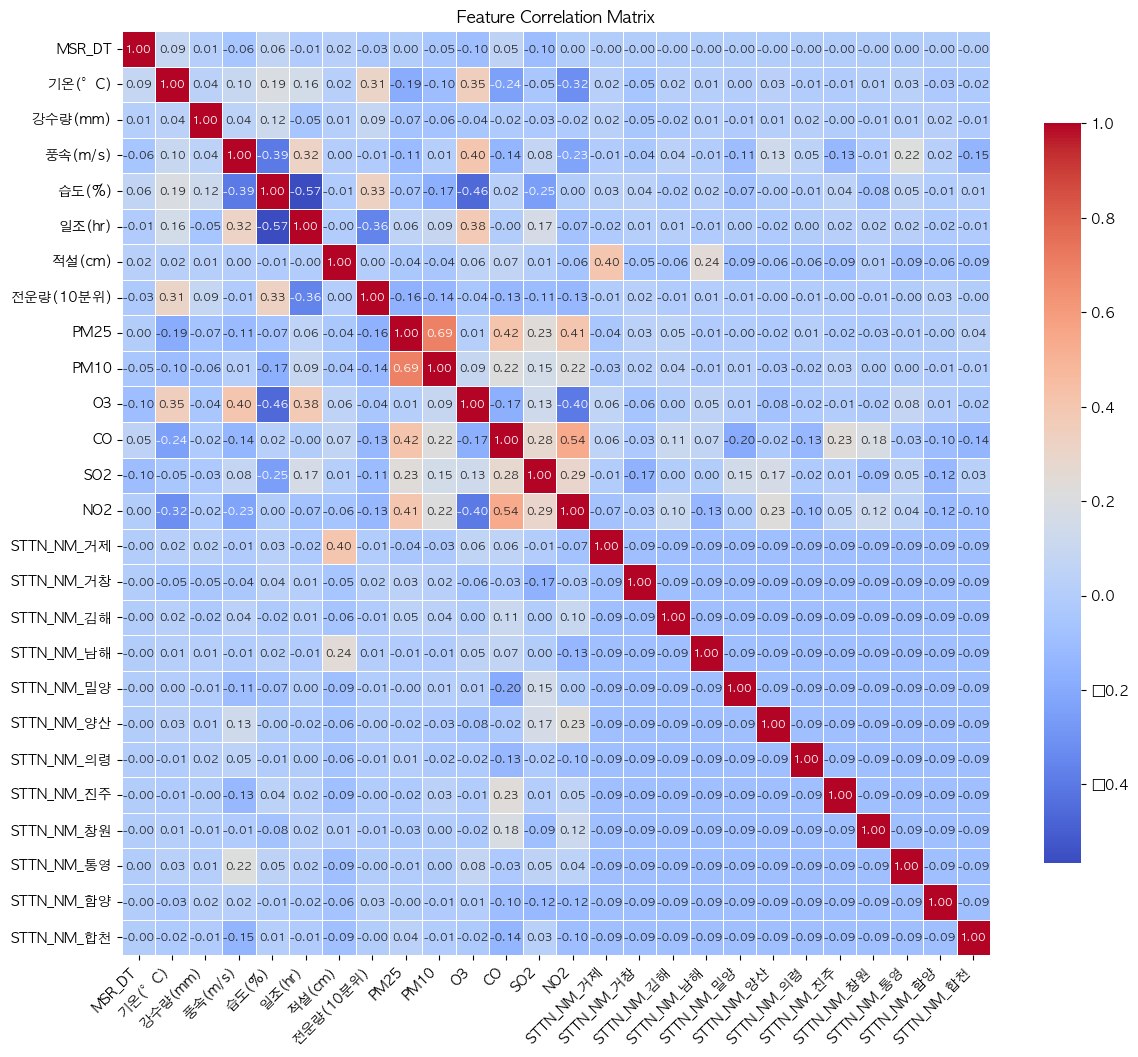

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm

# 한글 폰트 설정 (MacOS의 경우, 'AppleGothic'을 사용할 수 있습니다. Windows에서는 'Malgun Gothic'을 사용할 수 있습니다.)
# MacOS
plt.rcParams['font.family'] = 'AppleGothic'
# Windows
# plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 로드 및 전처리
df = pd.read_csv('/Users/hayden/Desktop/provincial council internship/df.csv', encoding='utf-8')

# MSR_DT를 날짜 형식으로 변환
df['MSR_DT'] = pd.to_datetime(df['MSR_DT'], format='%Y%m%d%H')

# 문자열 열을 원-핫 인코딩으로 변환
df = pd.get_dummies(df, columns=['STTN_NM'])

# Feature와 Target 변수 설정
target_col = 'PM10'
X = df.drop(['MSR_DT', target_col], axis=1)
y = df[target_col]

# 데이터 스케일링
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))  # y를 NumPy 배열로 변환 후 reshape

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 모델 훈련
model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=500, random_state=42)
model.fit(X_train, y_train.ravel())

# Permutation Importance 계산
perm_importance = permutation_importance(model, X_test, y_test.ravel(), n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(range(X.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(X.shape[1]), np.array(X.columns)[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Permutation Importance')
plt.show()

# 선형 회귀를 통한 피처 간 관계 분석
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_scaled)

# 회귀 계수 시각화
coefficients = lin_reg.coef_.flatten()
plt.figure(figsize=(12, 8))
plt.barh(range(X.shape[1]), coefficients[sorted_idx])
plt.yticks(range(X.shape[1]), np.array(X.columns)[sorted_idx])
plt.xlabel('Coefficient')
plt.title('Linear Regression Coefficients')
plt.show()

# 피처 간의 상관관계 분석
corr_matrix = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, annot_kws={"size": 8}, cbar_kws={"shrink": .8})
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전
plt.yticks(rotation=0)  # Y축 레이블 회전하지 않음
plt.title('Feature Correlation Matrix')
plt.show()


MLPRegressor는 일반적으로 피처의 중요도를 직접적으로 제공하지 않지만, 피처의 중요도를 추정하기 위해 다양한 방법을 사용할 수 있습니다. 예를 들어, 피처 중요도를 측정하는 방법으로 Permutation Importance(순열 중요도)를 사용할 수 있습니다. Permutation Importance는 모델의 예측 성능이 피처의 순서를 무작위로 섞었을 때 얼마나 감소하는지를 측정하여 피처의 중요도를 평가합니다.

또한, 중요한 피처와 결과 변수 간의 관계를 더 잘 이해하기 위해 선형 회귀 모델을 사용하여 관계식을 구할 수도 있습니다. 이를 통해 피처 간의 상관관계와 특정 피처가 PM10 예측에 어떤 영향을 미치는지 분석할 수 있습니다.

코드 설명
Permutation Importance 계산:

permutation_importance 함수를 사용하여 각 피처의 중요도를 계산합니다.
중요도는 예측 성능이 피처의 순서를 무작위로 섞었을 때 얼마나 감소하는지를 측정하여 평가됩니다.
중요도 값을 바탕으로 피처 중요도를 시각화합니다.
선형 회귀를 통한 피처 간 관계 분석:

선형 회귀 모델을 훈련시켜 각 피처의 회귀 계수를 구합니다.
회귀 계수는 각 피처가 타겟 변수에 미치는 영향을 나타냅니다.
피처 중요도와 회귀 계수를 시각화하여 어떤 피처가 중요한지 확인합니다.
피처 간의 상관관계 분석:

상관 행렬을 계산하고 시각화하여 피처 간의 상관관계를 분석합니다.
상관 행렬을 통해 특정 피처가 다른 피처와 어떻게 관련되어 있는지 파악할 수 있습니다.


내가 잘 못하는 것: 오버피팅 해결하기, 그래프 시각화 다루기 걍 다.. 열공 빡공 하셈 ㅎ